#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=3a46ddcd064f8f0a7c74a485f86b13d27e9bde666843f42d8942788226c395f0
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
#dataset taken from the UCI ML repo. Data description on site
#2) Import the dataset
dataset = pd.read_csv("Credit_Card_Applications.csv")

# Fraud is generally defined as sth far from the general rules. The frauds are
# the outlying neurons in the 2D SOM simply because  the outlier neurons are
# far from the majority of neurons in the neighbourhood

# To detect the outlying neurons, we need the MID (mean interneuron distance)
# mean of the Euclidean distance b/n a neuron and the neurons in its env't

# dataset[Class] = applicant approved or not

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Feature Scaling


In [4]:
# conc for DL
# for SOM, use Normalisation instead of Standardisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
#using minisom instead of building som from scratch
#Minisom(self, x, y, input_len, sigma, learning_rate...)
# x,y = grid of our SOM(10x10)
#length of our input is 15 (check X size)
#sigma = radius of different neighbourhoods in grid
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len = 15, sigma = 1, learning_rate = 0.5)
som.random_weights_init(X)#randomise the weights
som.train_random(data=X, num_iteration=100)

##Visualizing the results


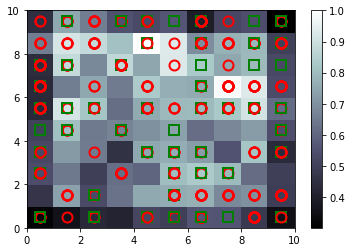

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone() #to initialise the window for the map
#pcolor(som.distance_map())
# we want to display results uisng colors and not values
pcolor(som.distance_map().T) #using MIDs for the color range
colorbar() # legend
# adding markers, red circle=Not Approved, green square=Approved
markers = ['o', 's'] #circle or square
colors = ['r', 'g'] # red or green
# loop over all customers
# i = indexes, x = vectors of customers (row)
for i, x in enumerate(X):
  w = som.winner(x) # coordinates of winning node
  plot(w[0] + 0.5,  # +0.5, to place shape in centre of winning node
       w[1] + 0.5,
       markers[y[i]], # finding out if node is a winning node
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',  # we can have two colors for the inner 
                                  # winning node so theres no need to color 
       markersize = 10,
       markeredgewidth = 2)
show()

## Finding the frauds


In [7]:
# we can't use inverse mapping here. No such function in minisom. Use a dict
mappings = som.win_map(X) #winning nodes(I have one likely fraudulent winning node)
#  from the map, the likely fraudulent winning node has coordinates 3,1

#frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0) 

#can't concatenate cos we have only one fraudulent winning node

frauds = mappings[(4,8)]
frauds = sc.inverse_transform(frauds)

##Printing the Fraud Clients

In [8]:
# print the ID
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15598266
15593694
15781574
